In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animefacedataset/images/35715_2011.jpg
/kaggle/input/animefacedataset/images/48610_2014.jpg
/kaggle/input/animefacedataset/images/34719_2011.jpg
/kaggle/input/animefacedataset/images/40266_2012.jpg
/kaggle/input/animefacedataset/images/4199_2002.jpg
/kaggle/input/animefacedataset/images/40739_2013.jpg
/kaggle/input/animefacedataset/images/42515_2013.jpg
/kaggle/input/animefacedataset/images/52482_2015.jpg
/kaggle/input/animefacedataset/images/46555_2014.jpg
/kaggle/input/animefacedataset/images/11579_2005.jpg
/kaggle/input/animefacedataset/images/36943_2012.jpg
/kaggle/input/animefacedataset/images/9787_2004.jpg
/kaggle/input/animefacedataset/images/3388_2002.jpg
/kaggle/input/animefacedataset/images/8393_2004.jpg
/kaggle/input/animefacedataset/images/30352_2010.jpg
/kaggle/input/animefacedataset/images/10908_2005.jpg
/kaggle/input/animefacedataset/images/22363_2008.jpg
/kaggle/input/animefacedataset/images/51151_2015.jpg
/kaggle/input/animefacedataset/images/59491_2018.j

Dataset = https://www.kaggle.com/datasets/splcher/animefacedataset

## GANs

The concept underlying GANs puts two neural networks against one another in a game. The generator and discriminator networks are the names given to these networks.

**Generator:** This network takes random noise as input, creates a sample that ideally resembles the training data, and uses that sample to generate new data instances, such as pictures.

**Discriminator:** This network aims to distinguish between fake data (samples produced by the generator) and real data (actual samples from the training set). It gains the ability to differentiate between authentic and fake input data.

For example, the Artist and the Detective are two buddies who play a game.

Drawing pictures is an artist's duty, although they are limited to employing their imagination when drawing. They are unable to view actual photos.
Determining whether the image that the Artist depicted is real (like a photo) or imagined (like a drawing) is the Detective's task.

Thus, while the Artist works tirelessly to create realistic-looking drawings, the Detective attempts to identify which images are authentic and which are not.

Playing together, the Artist becomes more adept at creating pictures that trick the Detective, while the Detective becomes more adept at determining whether or not the photos are real.

They practice and play together until the Artist's sketches are so lifelike that the Detective finds it challenging to distinguish them from actual images! That's how Generative Adversarial Networks work.

# Imports

In [2]:
import os
import cv2
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display

# HYPERPARAMETERS

In [3]:
CHANNELS = 3
BATCH_SIZE=128
LATENT_DIM= 100
HEIGHT  = WIDTH = 64
images_path = "/kaggle/input/animefacedataset/images"
#Change this to your image path

# HELPER FUNCTIONS AND DATA PIPELINE

In [4]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img)
    img = tf.image.resize_with_crop_or_pad(img, HEIGHT, WIDTH)
    img = tf.cast(img, tf.float32)
    img = (img - 127.5) / 127.5
    return img

def tf_dataset(images_path, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((images_path))
    dataset = dataset.shuffle(buffer_size=32)
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

def get_dataset_slice_paths(image_dir):
  '''returns a list of paths to the image files'''
  image_file_list = os.listdir(image_dir)
  image_paths = [os.path.join(image_dir, fname) for fname in image_file_list]

  return image_paths

def display_faces(dataset, size=9):
  '''Takes a sample from a dataset batch and plots it in a grid.'''
  dataset = dataset.unbatch().take(size)
  n_cols = 3
  n_rows = size//n_cols + 1
  plt.figure(figsize=(5, 5))
  i = 0
  for image in dataset:
    i += 1
#     print(image.shape)
    disp_img = np.reshape(image, (64,64,3))
    plt.subplot(n_rows, n_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(disp_img)


def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Displays a row of images.'''
  for idx, image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    image = np.reshape(image, shape)
    plt.imshow(image)


def display_results(disp_input_images, disp_predicted):
  '''Displays input and predicted images.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(IMAGE_SIZE,IMAGE_SIZE,3))
  display_one_row(disp_predicted, 20, shape=(IMAGE_SIZE,IMAGE_SIZE,3))
    
def plot_results(images, n_cols=None):
    '''visualizes fake images'''
    display.clear_output(wait=False)  

    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1

    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)

    plt.figure(figsize=(n_cols, n_rows))
    
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")
        


In [5]:
path = get_dataset_slice_paths(images_path)
images_dataset = tf_dataset(path, BATCH_SIZE)

# Visualization 

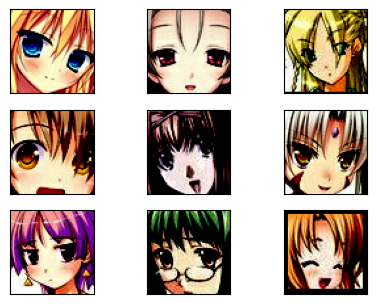

In [6]:
display_faces(images_dataset, size=9)

In [7]:
for image_batch in images_dataset.take(1):  # Only take one batch
    image_shape = image_batch[0].shape
    print("Image shape:", image_shape)

Image shape: (64, 64, 3)


# MODEL


## GENERATOR 
- A random noise of shape `(LATENT_DIM,)` is passed into a generator to generate a batch of fake images for the discriminator to identify. 
- A Conv2DTrasnpose layer is used to upsample the images
- The activation of every layer is `LeakyReLU` except the last convolutional layer whose activation parameter is set to `tanh`.

## Creating the Generator

In [8]:
generator_input = tf.keras.Input(shape=(LATENT_DIM,))

x = tf.keras.layers.Dense(128 * 32 * 32)(generator_input)
x = tf.keras.layers.LeakyReLU()(x)
# Task: Reshape the output to a 3D tensor of 32,32,128
# x = tf.keras.layers.Reshape((#TODO))(x)
x = tf.keras.layers.Reshape((32, 32, 128))(x)
    

# Task: Add convolutional layers of filter 256 and kernel 5 and same padding to upsample the tensor
# x = tf.keras.layers.Conv2D(#TODO, #TODO, #TODO)(x)
x = tf.keras.layers.Conv2D(256, 5, padding='same')(x)
# Add LeakyReLu activation
# x = #TODO
x = tf.keras.layers.LeakyReLU()(x)
    
# Task: Add convolutional layers of filter 256 and kernel 5 and same padding with stride = 2
# x = tf.keras.layers.Conv2DTranspose(#TODO)(x)
x = tf.keras.layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
# Add LeakyReLu activation
# x = #TODO
x = tf.keras.layers.LeakyReLU()(x)

# Task: Add more convolutional layers for refining the image
# Filter 256 kernel 5 and same padding
#x = tf.keras.layers.Conv2D(#TODO, #TODO, #TODO)(x)
x = tf.keras.layers.Conv2D(256, 5, padding='same')(x)
# Add LeakyReLu activation
#x = #TODO
x = tf.keras.layers.LeakyReLU()(x)

# Task: Add more convolutional layers for refining the image
# Filter 256 kernel 5 and same padding
# x = tf.keras.layers.Conv2D(#TODO, #TODO, #TODO)(x)
x = tf.keras.layers.Conv2D(256, 5, padding='same')(x)
# Add LeakyReLu activation
# x = #TODO
x = tf.keras.layers.LeakyReLU()(x)

#TODO: Final convolutional to create the required image 
#filter number of channels
# kernel 7
# activation
#same padding
    
# x = tf.keras.layers.Conv2D(#TODO)(x)
x = tf.keras.layers.Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)
# generator = tf.keras.models.Model(generator_input, x)
generator = tf.keras.models.Model(generator_input, x)
# generator.summary()
generator.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 131072)         │    13,238,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 256)    │     1,048,832 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 256)    │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 256)    │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 3)      │        37,635 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,421,507 (70.27 MB)

 Trainable params: 18,421,507 (70.27 MB)

 Non-trainable params: 0 (0.00 B)

## Discriminator

- The images created by the generator are passed through the discriminator to identify it as real or fake.
- The input shape is `(64 x 64 x 3)` 
- The activation of every layer is `LeakyReLU` except the last convolutional layer whose activation paramter is set to `sigmoid`.

## Creating a Discriminator

In [9]:
discriminator_input = tf.keras.layers.Input(shape=(HEIGHT, WIDTH, CHANNELS))
# Task: Create Convolution of filter 128, kernel 3 and use leakyReLu
# x = tf.keras.layers.Conv2D(#TODO)(x)
x = tf.keras.layers.Conv2D(128, 3)(discriminator_input)
# x = #TODO
x = tf.keras.layers.LeakyReLU()(x)
# Task: Create Convolution of filter 128, kernel 4 and use leakyReLu
# x = tf.keras.layers.Conv2D(#TODO)(x)
x = tf.keras.layers.Conv2D(128, 4, strides=2)(x)
# x = #TODO
x = tf.keras.layers.LeakyReLU()(x)
# Task: Create Convolution of filter 128, kernel 4 stride 2 and use leakyReLu
# x = tf.keras.layers.Conv2D(#TODO)(x)
x = tf.keras.layers.Conv2D(128, 4, strides=2)(x)
# x = #TODO
x = tf.keras.layers.LeakyReLU()(x)
# Task: Create Convolution of filter 128, kernel 4 stride 2 and use leakyReLu
# x = tf.keras.layers.Conv2D(#TODO)(x)
x = tf.keras.layers.Conv2D(128, 4, strides=2)(x)
# x = #TODO
x = tf.keras.layers.LeakyReLU()(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

discriminator = tf.keras.models.Model(discriminator_input, x)
discriminator.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         4,609 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,009 (3.03 MB)

 Trainable params: 795,009 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

## GAN  
- The GAN is built by sequentially adding the generator and discriminator respectively
- The input shape is `(LATENT_DIM,)`


In [10]:
gan_input = tf.keras.layers.Input(shape=(LATENT_DIM,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.models.Model(gan_input, gan_output)
gan.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 64, 64, 3)      │    18,421,507 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ (None, 1)              │       795,009 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,216,516 (73.31 MB)

 Trainable params: 19,216,516 (73.31 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the models
#### Discriminator
- Optimizer  = RMSPROP
- Loss function  = Binary Crossentropy
- Learning rate = 0.0008
- clipvalue=1.0
- decay 1e-8
- Loss BCE

In [11]:
# discriminator.compile(optimizer=#TODO, loss='#TODO)
# discriminator.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0008, clipvalue=1.0, decay=1e-8), loss='binary_crossentropy')
# Since decay is no longer supoorted
discriminator.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0008, clipvalue=1.0), loss='binary_crossentropy')
discriminator.trainable = False

#### GAN
- Optimizer  = RMSPROP
- Loss function  = Binary Crossentropy
- Learning rate = 0.0004
- clipvalue=1.0
- decay 1e-8
- Loss BCE

In [12]:
# gan.compile(optimizer=#TODO, loss='#TODO)
#gan.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0004, clipvalue=1.0, decay=1e-8), loss='binary_crossentropy')
gan.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0004, clipvalue=1.0), loss='binary_crossentropy')

## Training 
The training takes in 2 phases 
### Traning Phase 1 (Training the discriminator)
- Generate a random noise using `tf.random.normal`
- pass it to the `generator` to create a batch of fake images
- Concatenate the fake images and the real images
- Create labels for the discriminator 1 for real and 0 for fake images

### Training Phase 2 (Training the generator)
- Create a batch of noise input to feed to the `gan` using `tf.random.normal`
- Freeze the discriminator
- Train the `gan` on the noise with labels all set to True

The GAN is trained for 25 epochs


In [13]:
def train_gan(gan, dataset, random_normal_dimensions, n_epochs=50):
    """ Defines the two-phase training loop of the GAN
    Args:
      gan -- the GAN model which has the generator and discriminator
      dataset -- the training set of real images
      random_normal_dimensions -- dimensionality of the input to the generator
      n_epochs -- number of epochs
    """
    input_layer , generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))       
        for real_images in dataset:
            batch_size = real_images.shape[0]

            # Train the discriminator - PHASE 1
            # create the noise
            noise = tf.random.normal(shape=[batch_size, random_normal_dimensions])

            # use the noise to generate fake images
            fake_images = generator(noise)

            # create a list by concatenating the fake images with the real ones
            mixed_images = tf.concat([fake_images, real_images], axis=0)

            # Create the labels for the discriminator
            # 0 for the fake images
            # 1 for the real images
            discriminator_labels = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

            # ensure that the discriminator is trainable
            discriminator.trainable = True

            # use train_on_batch to train the discriminator with the mixed images and the discriminator labels
            discriminator.train_on_batch(mixed_images, discriminator_labels)

            # Train the generator - PHASE 2
            # create a batch of noise input to feed to the GAN
            noise = tf.random.normal(shape=[batch_size, random_normal_dimensions])
            
            # label all generated images to be "real"
            generator_labels = tf.constant([[1.]] * batch_size)

            # freeze the discriminator
            discriminator.trainable = False

            # train the GAN on the noise with the labels all set to be true
            gan.train_on_batch(noise, generator_labels)
        
        # plot the fake images used to train the discriminator
        plot_results(fake_images, 16)                     
        plt.show()  

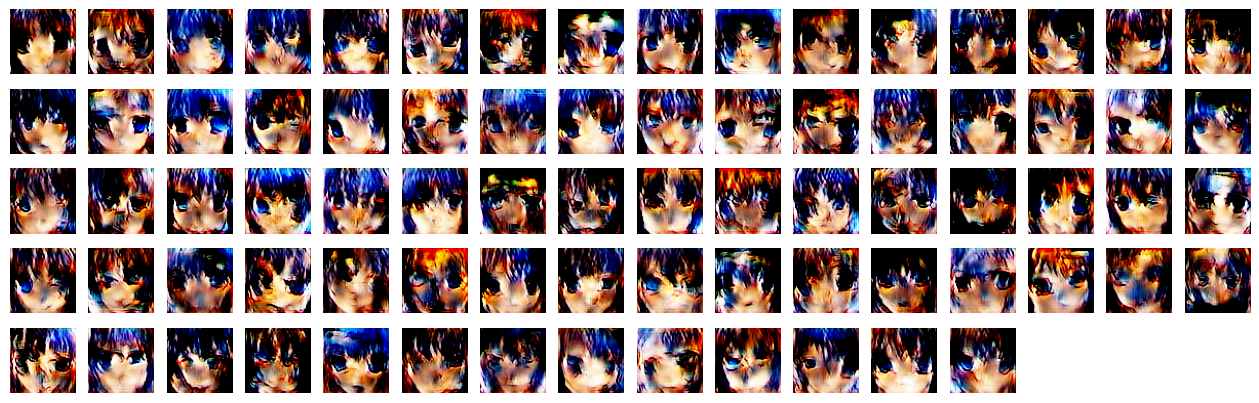

Epoch 2/5


In [ ]:
train_gan(gan , images_dataset , LATENT_DIM , 5)